In [1]:
#pd.reset_option('all')

In [2]:
#importing the required libraries
import pandas as pd , numpy as np, matplotlib.pyplot as plt, warnings ,seaborn as sns

In [3]:
#For the output of plotting commands to be displayed inline
%matplotlib inline

#To Suppress Warnings
warnings.filterwarnings("ignore")
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)


In [4]:
loan_df= pd.read_csv("loan.csv")

In [5]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,NaN,16-Apr,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
loan_df.shape

(39717, 111)

In [7]:
loan_df.columns = loan_df.columns.str.replace(' ', '')

In [8]:
loan_df.dropna(how='all',axis=1,inplace=True)

In [9]:
loan_df.shape

(39717, 57)

In [10]:
data_dict= pd.read_excel("Data_Dictionary.xlsx")
data_dict.dropna(how='all', axis='columns',inplace=True)
data_dict.dropna(how='any', axis='rows',inplace=True)

In [11]:
data_dict.set_index('LoanStatNew',inplace=True)

In [12]:
pd.set_option('max_colwidth', None)
data_dict.loc[loan_df.columns.values]

,Description
LoanStatNew,
id,A unique LC assigned ID for the loan listing.
member_id,A unique LC assigned Id for the borrower member.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade


In [13]:
pd.reset_option('max_colwidth')

In [14]:
non_driving_variables = ['funded_amnt','funded_amnt_inv','url','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','out_prncp',
                         'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                        'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
                        ]


In [15]:
loan_df.drop(columns=non_driving_variables,axis=1,inplace=True)

In [16]:
loan_df.shape

(39717, 38)

In [17]:
pd.set_option('max_colwidth', None)
data_dict.loc[loan_df.columns.values]

,Description
LoanStatNew,
id,A unique LC assigned ID for the loan listing.
member_id,A unique LC assigned Id for the borrower member.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*


In [18]:
pd.reset_option('max_colwidth')

In [19]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [20]:
## function to plot the pie chart for columns with either 0 or Nan values
def zero_NA_percentage(col):
    col.value_counts(dropna=False).plot.pie(autopct='%.2f',figsize=(4,4))
    plt.show()

### tax_liens - All the values are either 0 or NA

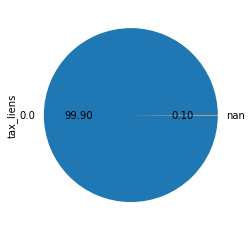

In [21]:
zero_NA_percentage(loan_df['tax_liens'])

In [22]:
loan_df.drop(columns=['tax_liens'],axis=1,inplace=True)

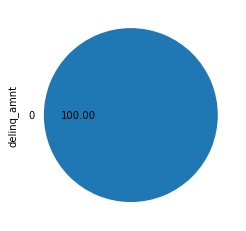

In [23]:
zero_NA_percentage(loan_df['delinq_amnt'])

In [24]:
loan_df.drop(columns=['delinq_amnt'],axis=1,inplace=True)

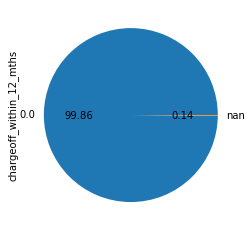

In [25]:
zero_NA_percentage(loan_df['chargeoff_within_12_mths'])

In [26]:
loan_df.drop(columns=['chargeoff_within_12_mths'],axis=1,inplace=True)

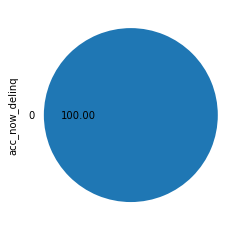

In [27]:
zero_NA_percentage(loan_df['acc_now_delinq'])

In [28]:
loan_df.drop(columns=['acc_now_delinq'],axis=1,inplace=True)

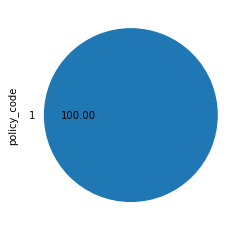

In [29]:
zero_NA_percentage(loan_df['policy_code'])

In [30]:
loan_df.drop(columns=['policy_code'],axis=1,inplace=True)

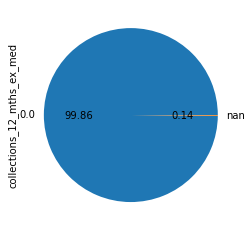

In [31]:
zero_NA_percentage(loan_df['collections_12_mths_ex_med'])

In [32]:
loan_df.drop(columns=['collections_12_mths_ex_med'],axis=1,inplace=True)

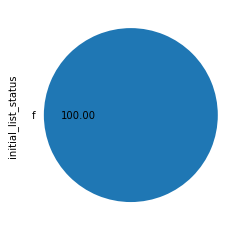

In [33]:
zero_NA_percentage(loan_df['initial_list_status'])

In [34]:
loan_df.drop(columns=['initial_list_status'],axis=1,inplace=True)

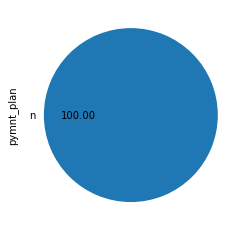

In [35]:
zero_NA_percentage(loan_df['pymnt_plan'])

In [36]:
loan_df.drop(columns=['pymnt_plan'],axis=1,inplace=True)

#### check rows and columns with  missing values
     39717 total entries
     

In [37]:
(len(loan_df.desc)-loan_df.desc.count())/len(loan_df.desc)* 100

32.58050708764509

#### more than 30 % values are missing , so dropping "desc"

In [38]:
loan_df.drop(columns=['desc'],axis=1,inplace=True)

In [39]:
(len(loan_df.mths_since_last_record)-loan_df.mths_since_last_record.count())/len(loan_df.mths_since_last_record)* 100

92.98537150338646

#### more than 90 % values are missing , so dropping "mths_since_last_record"

In [40]:
loan_df.drop(columns=['mths_since_last_record'],axis=1,inplace=True)

##### dropping id and member_id , since they wont be affect any analysis

In [41]:
loan_df.drop(columns=['id'],axis=1,inplace=True)
loan_df.drop(columns=['member_id'],axis=1,inplace=True)

In [45]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

###  dropping rows with loan _status as Current , since it doesn't count as fully paid or Charged Off

In [46]:
loan_df=loan_df[~(loan_df.loan_status=='Current')]

In [47]:
loan_df.shape

(38577, 26)

#### putting 1 or 0 for Fully Paid and Charged Off respectively , so that it can be treated for  numerical analysis 

In [48]:
loan_df.loan_status= loan_df.loan_status.apply(lambda x:1 if x=='Fully Paid' else 0)

### converting term to int and trimming months from it

In [49]:
loan_df.term= loan_df.term.apply(lambda x:int(x.split()[0]))

In [50]:
loan_df.term.head()

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

### converting int_rate to float  and trimming % from it 

In [51]:
loan_df.int_rate= loan_df.int_rate.apply(lambda x:float(x.split('%')[0]))

In [52]:
loan_df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

### converting emp_length to int

In [53]:
loan_df.emp_length.value_counts(dropna=False)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
NaN          1033
Name: emp_length, dtype: int64

In [54]:
loan_df.emp_length=loan_df.emp_length.fillna(value=0)

### Assumptions for emp_length
    - 10+ years = 10
    - <1 year = .5
    - NaN = 0

In [55]:
loan_df.emp_length=loan_df.emp_length.apply(lambda x: float(10) if x=="10+ years" else
                                            ( float(0.5) if x=="< 1 year" else float(str(x).split()[0])))

In [56]:
loan_df.emp_length.head()

0    10.0
1     0.5
2    10.0
3    10.0
5     3.0
Name: emp_length, dtype: float64

### handling date types of issue_d
    - converting into datetime
    - Since all the values are of year 2021, extracting just the month

In [57]:
loan_df.issue_d = pd.to_datetime(loan_df.issue_d,format='%d-%b').dt.month

In [58]:
loan_df.issue_d.value_counts()

12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: issue_d, dtype: int64

#### handling zip_code 
    - extracting the first 3 code from the values
    

In [59]:
loan_df.zip_code= loan_df.zip_code.apply(lambda x:int(x.rstrip('x')))

In [60]:
loan_df.zip_code.head()

0    860
1    309
2    606
3    917
5    852
Name: zip_code, dtype: int64

#### handling earliest_cr_line 
    - extracting just the year , since month will not make much difference
    - some dates are in the format "date-Month" and those are for year 2021

In [61]:
loan_df['earliest_cr_line']= loan_df['earliest_cr_line'].apply(lambda  x : int(str(x).split('-')[1])
                                                               if str(x).split('-')[1].isnumeric()
                                                               else 2021 )

In [62]:
loan_df['earliest_cr_line'].head()

0      85
1      99
2    2021
3      96
5    2021
Name: earliest_cr_line, dtype: int64

### handling revol_util
   

In [63]:
loan_df.revol_util.isna().sum()

50

##### Imputing the data for revol_util
    - since the data is missing , we can put it as 0

In [64]:
loan_df.revol_util.fillna(value=0,inplace=True)
loan_df.revol_util.isna().sum()

0

###### stripping the "%" from all the values

In [65]:
loan_df.revol_util= loan_df.revol_util.apply(lambda x:float(str(x).rstrip('%')))

In [66]:
loan_df.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

### handling application_type
    

In [67]:
loan_df.application_type.value_counts()

INDIVIDUAL    38577
Name: application_type, dtype: int64

###### all the application_type are of "INDIVIDUAL", so they wont be affecting the target variable

In [68]:
loan_df.drop(columns=['application_type'],axis=1,inplace=True)

## Final dataframe after data cleaning of missing and empty columns

In [299]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  int64  
 2   int_rate              38577 non-null  float64
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_title             36191 non-null  object 
 7   emp_length            38577 non-null  float64
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  int64  
 12  loan_status           38577 non-null  int64  
 13  purpose               38577 non-null  object 
 14  title                 38566 non-null  object 
 15  zip_code           

In [300]:
pd.set_option('max_colwidth', None)

In [301]:
data_dict.loc[loan_df.columns.values]

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."


In [302]:
pd.reset_option('max_colwidth')

## Getting all the numeric columns 

In [69]:
loan_df_intTypes = loan_df.select_dtypes(include = ['float64', 'int64'])
loan_df_intTypes.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,zip_code,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,10.0,24000.0,12,1,860,27.65,85,3,0,13648,83.7,9,0.0
1,2500,60,15.27,59.83,0.5,30000.0,12,0,309,1.00,99,3,0,1687,9.4,4,0.0
2,2400,36,15.96,84.33,10.0,12252.0,12,1,606,8.72,2021,2,0,2956,98.5,10,0.0
3,10000,36,13.49,339.31,10.0,49200.0,12,1,917,20.00,96,10,0,5598,21.0,37,0.0
5,5000,36,7.90,156.46,3.0,36000.0,12,1,852,11.20,2021,9,0,7963,28.3,12,0.0


## Data Analysis
    - Now we will analyze all the individual columns and there affect on the Target variable which is "loan_status"

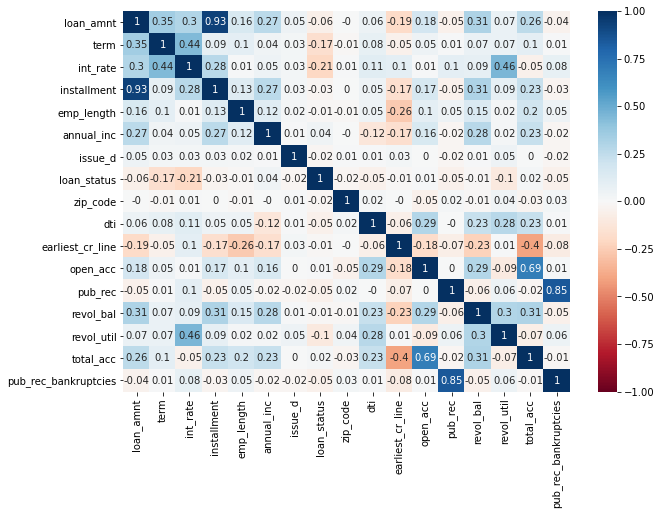

In [70]:
plt.figure(figsize=(10,7))
corrmat = loan_df_intTypes.corr() 
sns.heatmap(round(corrmat,2), cmap='RdBu', annot=True, annot_kws={"size": 10}, vmin=-1, vmax=1); 
plt.show()

## Conclusion:
    - Not much can be inferred from the correlation of loan_status wit the other numerical values
    - there are positive as well as negative correlation but the correlation coefficent is very less to derive any useful 
       info

### Univariate Analysis

In [71]:
#loan_amnt
loan_df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### creating another dataframe with records with loan_status as "Charged Off"

In [72]:
loan_df_defaulters= loan_df[loan_df.loan_status==0]

In [73]:
loan_df_defaulters.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
1,2500,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,12,0,car,bike,309,GA,1.00,99,3,0,1687,9.4,4,0.0
8,5600,60,21.28,152.39,F,F2,NaN,4.0,OWN,40000.0,Source Verified,12,0,small_business,Expand Business & Buy Debt Portfolio,958,CA,5.55,2021,11,0,5210,32.6,13,0.0
9,5375,60,12.69,121.45,B,B5,Starbucks,0.5,RENT,15000.0,Verified,12,0,other,Building my credit history.,774,TX,18.08,2021,2,0,9279,36.5,3,0.0
12,9000,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0.5,RENT,30000.0,Source Verified,12,0,debt_consolidation,freedom,245,VA,10.08,2021,4,0,10452,91.7,9,0.0
14,10000,36,10.65,325.74,B,B2,SFMTA,3.0,RENT,100000.0,Source Verified,12,0,other,Other Loan,951,CA,7.06,91,14,0,11997,55.5,29,0.0


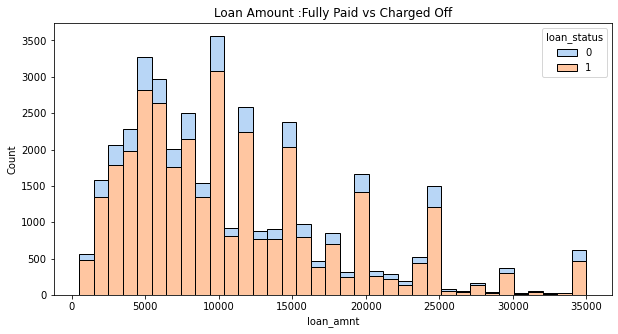

In [74]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)

sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.loan_amnt, kde=False,
             palette="pastel", hue=loan_df.loan_status,
             element="bars", legend=True,bins=35)
ax.set_title("Loan Amount :Fully Paid vs Charged Off")
plt.show()


 - We can see peaks at round amounts like 5000,10000,15000,25000 etc, that means people look out for loans in round amount
 - 10000 is the most favoured amount and 35000 is the max loan amount applied for
 -  not much relation between loan amount and defaulter can be derived
    


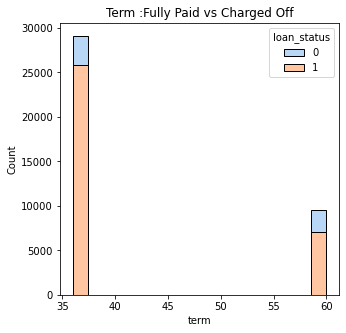

In [75]:
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.term, kde=False,
             palette="pastel", hue=loan_df.loan_status,
             element="bars", legend=True)
ax.set_title("Term :Fully Paid vs Charged Off")
plt.show()

- most of the loans are short term loans
- defaulters doesnt have a direct relationship with terms

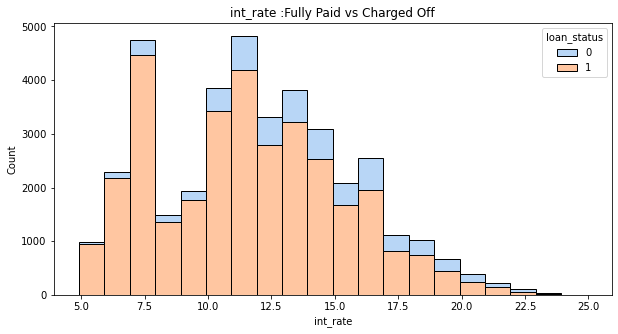

In [76]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)

sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.int_rate, kde=False,discrete=True,
             palette="pastel", hue=loan_df.loan_status,
             element="bars", legend=True)
ax.set_title("int_rate :Fully Paid vs Charged Off")
plt.show()

- almost all the interest rates(low ,medium and high) have defaulters
- not much relation

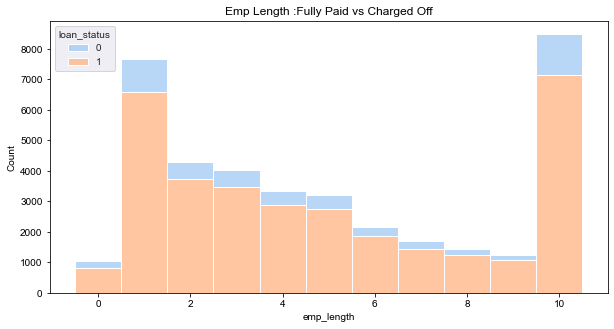

In [77]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.emp_length, kde=False,
             palette="pastel", hue=loan_df.loan_status,discrete=True,
             element="bars", legend=True)
ax.set_title("Emp Length :Fully Paid vs Charged Off")
plt.show()

- most people who took loans have either employment length of "1 and <1" years or "10 and 10+" 
- defaulters are spread out across all the employment length , but more at 1 year and "10 and 10+" 

Text(0.5, 1.0, 'emp_length : Percentage of defaulters ')

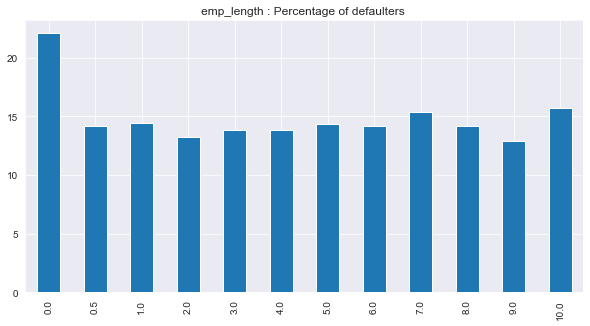

In [78]:
plt.figure(figsize=(10,5))
(loan_df_defaulters.emp_length.value_counts()/loan_df.emp_length.value_counts() * 100).plot.bar()
plt.title("emp_length : Percentage of defaulters ")

- we can see that there are 13-15% defaulters for almost all the emp lengths
- people having 0 years of work exp have the most percentage of defaulters for that section which is around 22%

#### Analysing Annual Income

In [135]:
loan_df.annual_inc.describe().apply(lambda x: format(x, 'f'))

count      38577.000000
mean       68777.973681
std        64218.681802
min         4000.000000
25%        40000.000000
50%        58868.000000
75%        82000.000000
max      6000000.000000
Name: annual_inc, dtype: object

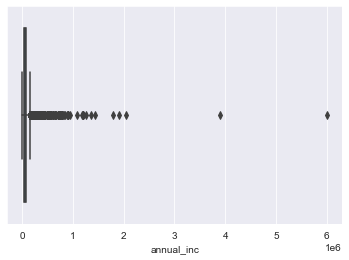

In [79]:
sns.boxplot(loan_df.annual_inc)
plt.show()

- there are a lot of outliers, so we clean the data

In [305]:
#calculating the IQR and data range 
q3, q1 = np.percentile(loan_df.annual_inc, [75 ,25])
iqr = q3 - q1
res_annual_inc= loan_df[(loan_df.annual_inc > (q1 - 1.5 * iqr))  & (loan_df.annual_inc < (q3 + 1.5 * iqr))]

res_annual_inc.annual_inc.describe()


count     36754.000000
mean      61079.142225
std       28040.679299
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      144997.000000
Name: annual_inc, dtype: float64

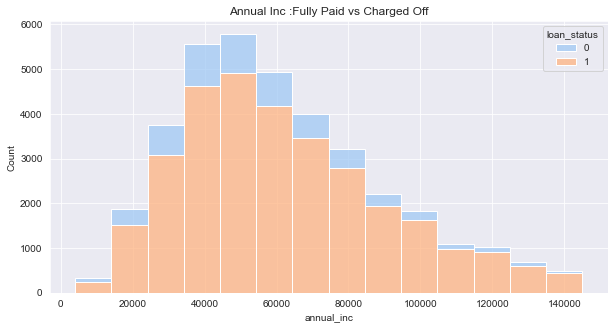

In [306]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=res_annual_inc,ax=ax, stat="count", multiple="stack",
             x=res_annual_inc.annual_inc, kde=False,
             palette="pastel", hue=res.loan_status,bins=14,
             element="bars", legend=True)
ax.set_title("Annual Inc :Fully Paid vs Charged Off")
plt.show()

- we see the defaulters are more in the lower income section specially between 30000-70000 annual Income range

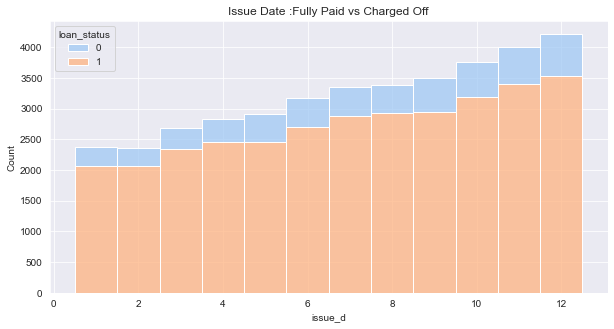

In [144]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.issue_d, kde=False,
             palette="pastel", hue=loan_df.loan_status,discrete=True,
             element="bars", legend=True)
ax.set_title("Issue Date :Fully Paid vs Charged Off")
plt.show()

Text(0.5, 1.0, 'Issue date : Percentage of defaulters ')

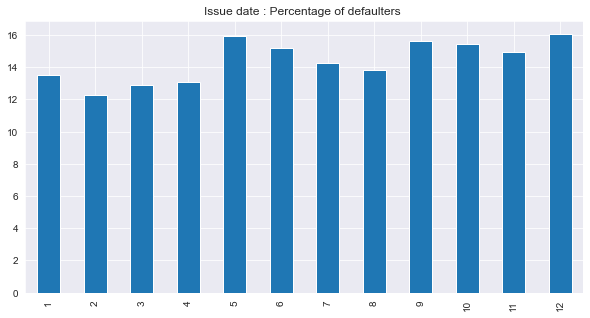

In [143]:
plt.figure(figsize=(10,5))
(loan_df_defaulters.issue_d.value_counts()/loan_df.issue_d.value_counts() * 100).plot.bar()
plt.title("Issue date : Percentage of defaulters ")

- As we see that as the financial years ends in september, the number of loans also starts increasing from that month and goes on till December 
- As a result, the number of defaulters are also more in those months September to December
- We can also see percentage of defaulters is in the range of 12-16% across all the months. 


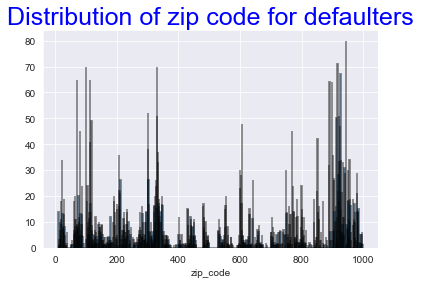

In [182]:
sns.distplot(loan_df_defaulters.zip_code,kde=False,bins=1000,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("Distribution of zip code for defaulters",fontsize=25,color="b")
plt.show()

- we can see there are some peaks at  some places where there are more no of defaulters

In [184]:
#top percentages of zip codes where the defaulters are 
(loan_df_defaulters.zip_code.value_counts(normalize=True,ascending=False)*100).head(10)

945    1.421717
917    1.261774
100    1.244002
331    1.244002
926    1.190688
70     1.155145
112    1.155145
900    1.137373
891    1.137373
300    0.924116
Name: zip_code, dtype: float64

From above results we can see ,out of the 1000 zip codes below zip codes each contibute around 1% of defaulters

|Zip Code | %age |
| --- | --- |
|945|1.421717|
|917|1.261774|
|100|1.244002|
|331|1.244002|
|926|1.190688|
|70| 1.155145|
|112|1.155145|
|900|1.137373|
|891|1.137373|

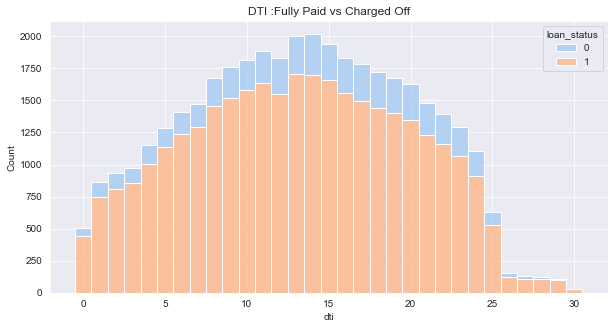

In [195]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.dti, kde=False,
             palette="pastel", hue=loan_df.loan_status,discrete=True,
             element="bars", legend=True)
ax.set_title("DTI :Fully Paid vs Charged Off")
plt.show()

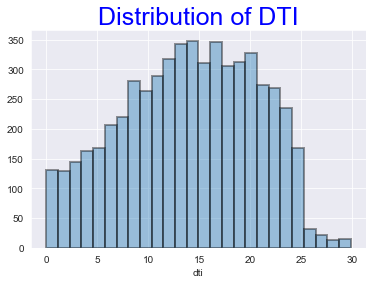

In [188]:
sns.distplot(loan_df_defaulters.dti,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("Distribution of DTI",fontsize=25,color="b")
plt.show()

- usually people with DTI till 25% are applying for loan, higher than this ratio there are very few appliers
- Also we can see that there are considerable no of  defaulters from the range 10% to 25 %

In [196]:
loan_df_defaulters.open_acc.describe()

count    5627.000000
mean        9.178070
std         4.525937
min         2.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        38.000000
Name: open_acc, dtype: float64

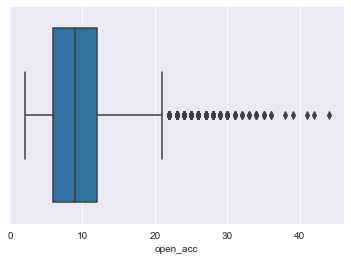

In [197]:
sns.boxplot(loan_df.open_acc)
plt.show()

- there are many outliers in the data, so we will clean it 

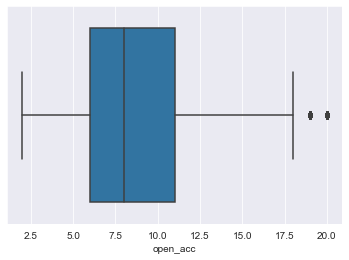

In [202]:
#calculating the IQR and data range 
q3, q1 = np.percentile(loan_df.open_acc, [75 ,25])
iqr = q3 - q1
res_open_acc= loan_df[(loan_df.open_acc > (q1 - 1.5 * iqr))  & (loan_df.open_acc < (q3 + 1.5 * iqr))]
sns.boxplot(res_open_acc.open_acc)
plt.show()

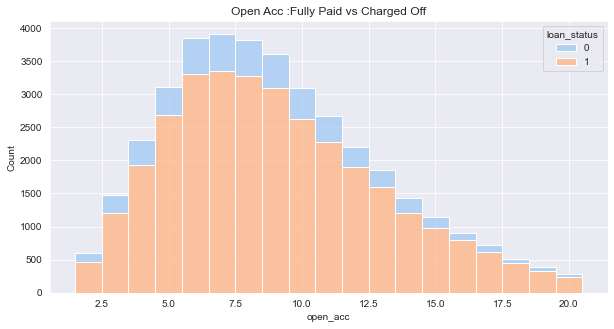

In [209]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=res_open_acc,ax=ax, stat="count", multiple="stack",
             x=res_open_acc.open_acc, kde=False,
             palette="pastel", hue=loan_df.loan_status,discrete=True,
             element="bars", legend=True)
ax.set_title("Open Acc :Fully Paid vs Charged Off")
plt.show()

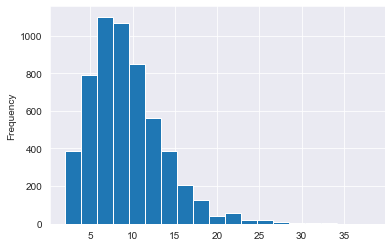

In [212]:
loan_df_defaulters.open_acc.plot.hist(bins=19)
plt.show()

- we can see there most of the defaulters are people having 6-10 open credit lines in there account.
- Most of the loan appliers are also from this range only.
- very less applications from people who already have high open credit lines(more than 20 )

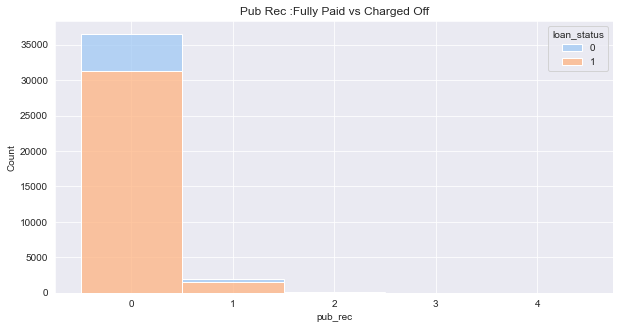

In [214]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.pub_rec, kde=False,
             palette="pastel", hue=loan_df.loan_status,discrete=True,
             element="bars", legend=True)
ax.set_title("Pub Rec :Fully Paid vs Charged Off")
plt.show()

- No direct relation between No of defaulters and No of Deregatory records of the applicant

In [217]:
loan_df.revol_bal.describe()

count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64

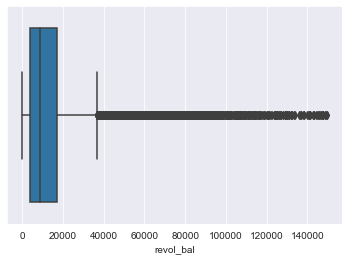

In [215]:
sns.boxplot(loan_df.revol_bal)
plt.show()

- we see a lot of outliers in this column, so cleaning it

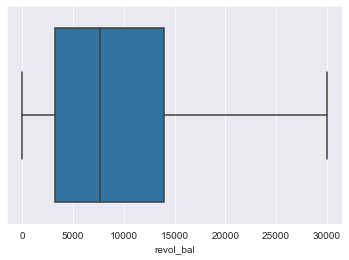

In [234]:
#calculating the IQR and data range 
#Keeping the upper fence at 30000 since q1 + 1.5 * iqr range is still having a lot of outliers in it
q3, q1 = np.percentile(loan_df.revol_bal, [75 ,25])
iqr = q3 - q1
res_revol_bal= loan_df[(loan_df.revol_bal > (q1 - 1.5 * iqr))  & (loan_df.revol_bal < (30000))]
sns.boxplot(res_revol_bal.revol_bal)
plt.show()

##### Assumption:
-Keeping the upper fence at 30000 since (q1 + 1.5 * iqr) range is still having a lot of outliers in it

In [236]:
res_revol_bal.revol_bal.describe()

count    34952.000000
mean      9344.665970
std       7435.995498
min          0.000000
25%       3238.750000
50%       7679.000000
75%      13957.000000
max      29993.000000
Name: revol_bal, dtype: float64

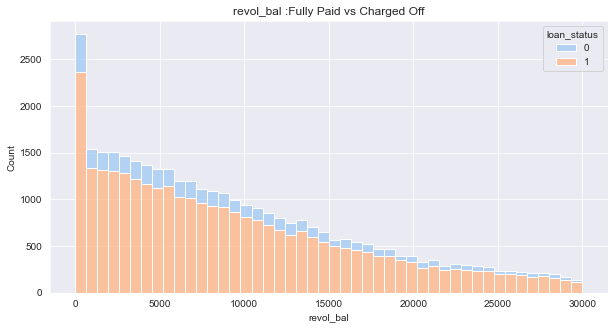

In [238]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=res_revol_bal,ax=ax, stat="count", multiple="stack",
             x=res_revol_bal.revol_bal, kde=False,
             palette="pastel", hue=loan_df.loan_status,
             element="bars", legend=True)
ax.set_title("revol_bal :Fully Paid vs Charged Off")
plt.show()

- A lot of people who don't have any revolving balance("0") are applying for the loan, hence defaulters are also more
- Almost all values of revolving balance have defaulters.
- No direct relation between revolving balance and defaulters

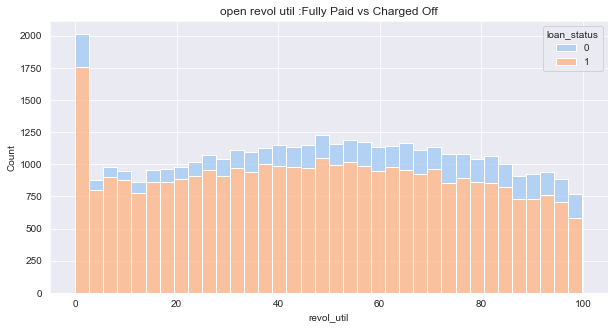

In [252]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.revol_util, kde=False,
             palette="pastel", hue=loan_df.loan_status,
             element="bars", legend=True)
ax.set_title("open revol util :Fully Paid vs Charged Off")
plt.show()

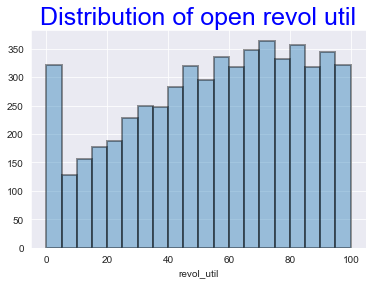

In [91]:
sns.distplot(loan_df_defaulters.revol_util,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("Distribution of open revol util",fontsize=25,color="b")
plt.show()

- High Revol Util Values have higher number of defaulters among all the defaulters

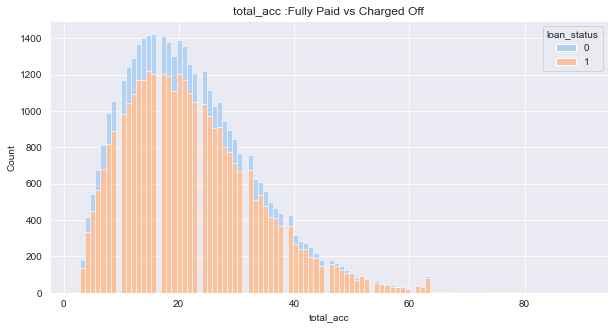

In [261]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.total_acc, kde=False,
             palette="pastel", hue=loan_df.loan_status,bins=100,
             element="bars", legend=True)
ax.set_title("total_acc :Fully Paid vs Charged Off")
plt.show()

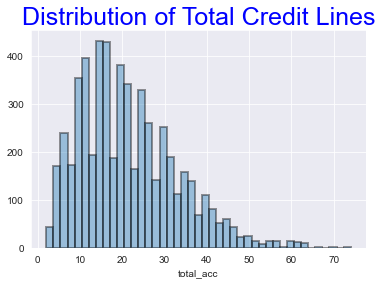

In [262]:
sns.distplot(loan_df_defaulters.total_acc,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("Distribution of Total Credit Lines",fontsize=25,color="b")
plt.show()

- Most of the people applying loans have already 10-30 credit lines open on there account. 
- Percentage of defaulters is also high in those range 

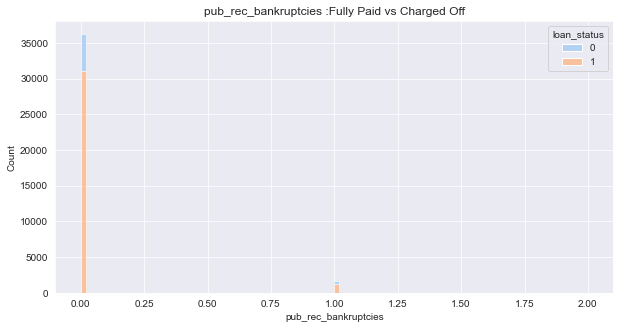

In [263]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.pub_rec_bankruptcies, kde=False,
             palette="pastel", hue=loan_df.loan_status,bins=100,
             element="bars", legend=True)
ax.set_title("pub_rec_bankruptcies :Fully Paid vs Charged Off")
plt.show()

- No direct relation between defaulters and bankruptcy record

## Analysing Categorical Variables

In [267]:
loan_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   grade                38577 non-null  object
 1   sub_grade            38577 non-null  object
 2   emp_title            36191 non-null  object
 3   home_ownership       38577 non-null  object
 4   verification_status  38577 non-null  object
 5   purpose              38577 non-null  object
 6   title                38566 non-null  object
 7   addr_state           38577 non-null  object
dtypes: object(8)
memory usage: 3.7+ MB


<AxesSubplot:>

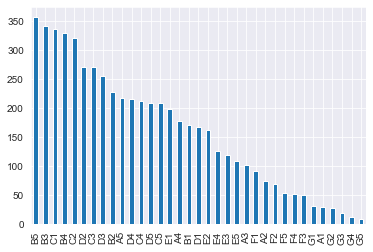

In [95]:
loan_df_defaulters.sub_grade.value_counts().plot.bar()

- There are defaulters in alost all the sub grades
- But of all the defaulters , no of defaulters is relatively large in anyone having sub grade >= B2 i.e B2,B3,...,C1,C2...D1 etc

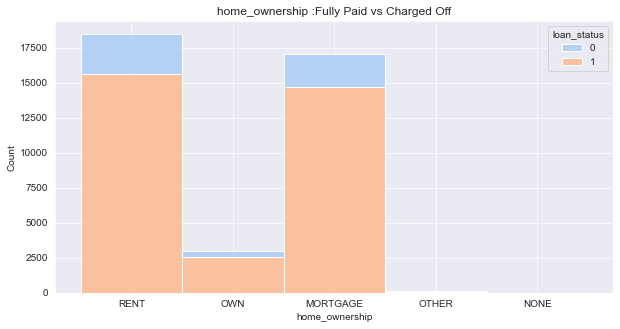

In [280]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.home_ownership, kde=False,
             palette="pastel", hue=loan_df.loan_status,
             element="bars", legend=True)
ax.set_title("home_ownership :Fully Paid vs Charged Off")
plt.show()

- Most of the defaulters are people who generally Rent or Mortgage

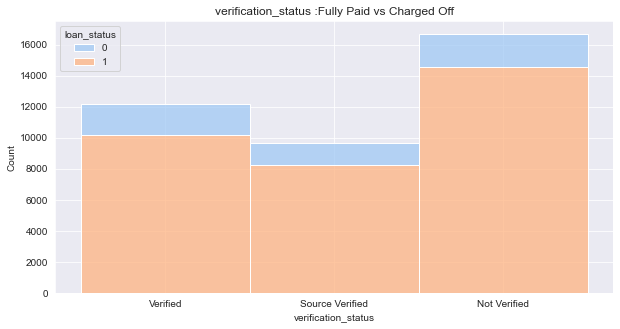

In [279]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.verification_status, kde=False,
             palette="pastel", hue=loan_df.loan_status,
             element="bars", legend=True)
ax.set_title("verification_status :Fully Paid vs Charged Off")
plt.show()

- Very less Defaulters when the applicant's income is source verified.
- Not Verified and Verified applicants have a higher number of defaulters.

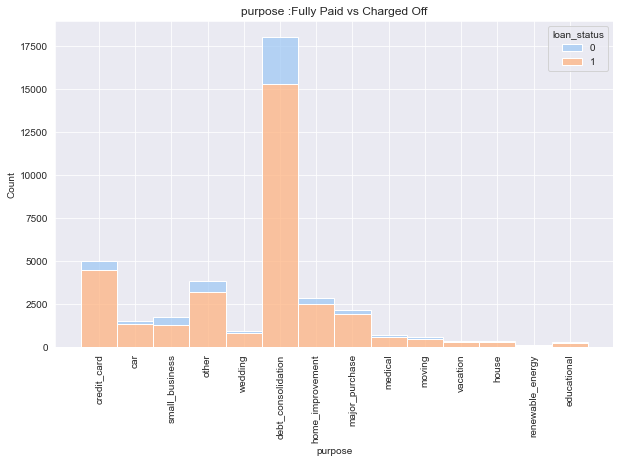

In [286]:
f = plt.figure(figsize=(10,6))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.purpose, kde=False,
             palette="pastel", hue=loan_df.loan_status,discrete=True,
             element="bars", legend=True)
ax.set_title("purpose :Fully Paid vs Charged Off")
plt.xticks(rotation=90)
plt.show()

- Most of the loans taken are for Debt Consolidation,resulting in more defaulters
- Also people having "Other" as a purpose have high percentage of defaulters

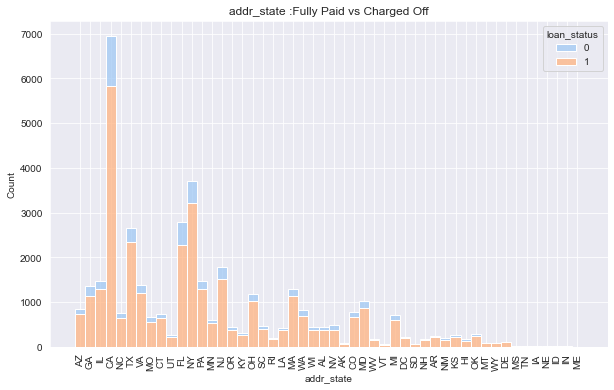

In [292]:
f = plt.figure(figsize=(10,6))
ax = f.add_subplot(1,1,1)
sns.set_style('darkgrid')
sns.histplot(data=loan_df,ax=ax, stat="count", multiple="stack",
             x=loan_df.addr_state, kde=False,
             palette="pastel", hue=loan_df.loan_status,discrete=True,
             element="bars", legend=True)
ax.set_title("addr_state :Fully Paid vs Charged Off")
plt.xticks(rotation=90)
plt.show()

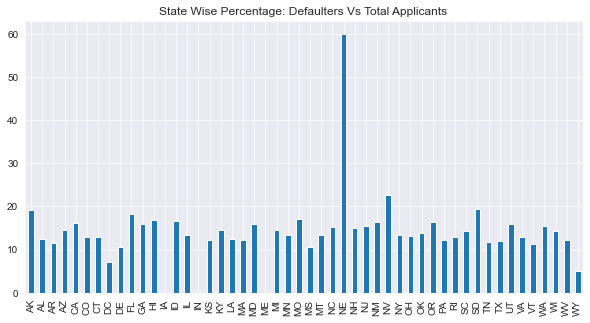

In [298]:
plt.figure(figsize=(10,5))
(loan_df_defaulters.addr_state.value_counts()/loan_df.addr_state.value_counts() * 100).plot.bar()
plt.title("State Wise Percentage: Defaulters Vs Total Applicants ")
plt.show()

- States like CA, NY, FL,TX  are having more no of applicants and hence more no of defaulters.
- There are some states which have relatively higher percentage of defaulters like AK, FL, NV, SD with around 20% of applicants defaulting.
- One peak of around 60% for a state NE , but the number of applicants were very less (3 defaulters out of 5)
- Few states having 0 defaulters like IA,IN,ME

## Bivariate Analysis

In [309]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  int64  
 2   int_rate              38577 non-null  float64
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_title             36191 non-null  object 
 7   emp_length            38577 non-null  float64
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  int64  
 12  loan_status           38577 non-null  int64  
 13  purpose               38577 non-null  object 
 14  title                 38566 non-null  object 
 15  zip_code           

In [336]:
pd.set_option('max_colwidth', None)
data_dict.loc[loan_df.columns.values]

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."


In [317]:
res_annual_inc.loan_status.value_counts()

1    31325
0     5429
Name: loan_status, dtype: int64

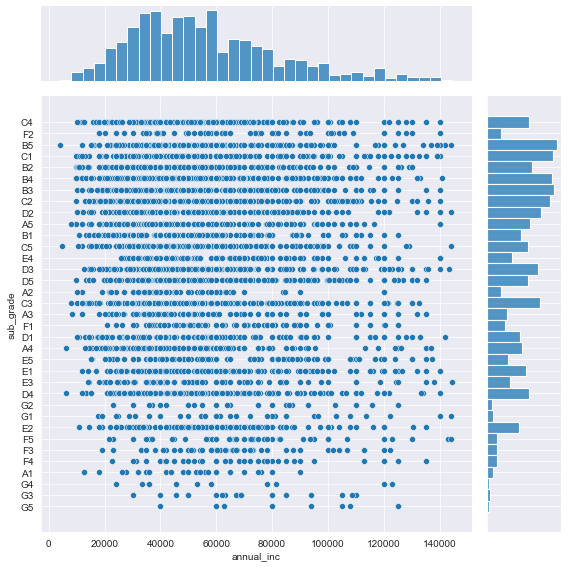

In [332]:
sns.jointplot(res_annual_inc[res_annual_inc.loan_status==0].annual_inc,loan_df_defaulters.sub_grade, kind="scatter",height=8)



- we see a cluster of applicants who have defaulted belonging to a lower sub grade and have lower incomes
- we see a direct relation between income and sub grades, lower income is usually assigned lower grades among the defaulters 

In [345]:
loan_df_defaulters_intTypes = loan_df_defaulters.select_dtypes(include = ['float64', 'int64'])
loan_df_defaulters_intTypes.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,zip_code,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
1,2500,60,15.27,59.83,0.5,30000.0,12,0,309,1.00,99,3,0,1687,9.4,4,0.0
8,5600,60,21.28,152.39,4.0,40000.0,12,0,958,5.55,2021,11,0,5210,32.6,13,0.0
9,5375,60,12.69,121.45,0.5,15000.0,12,0,774,18.08,2021,2,0,9279,36.5,3,0.0
12,9000,36,13.49,305.38,0.5,30000.0,12,0,245,10.08,2021,4,0,10452,91.7,9,0.0
14,10000,36,10.65,325.74,3.0,100000.0,12,0,951,7.06,91,14,0,11997,55.5,29,0.0


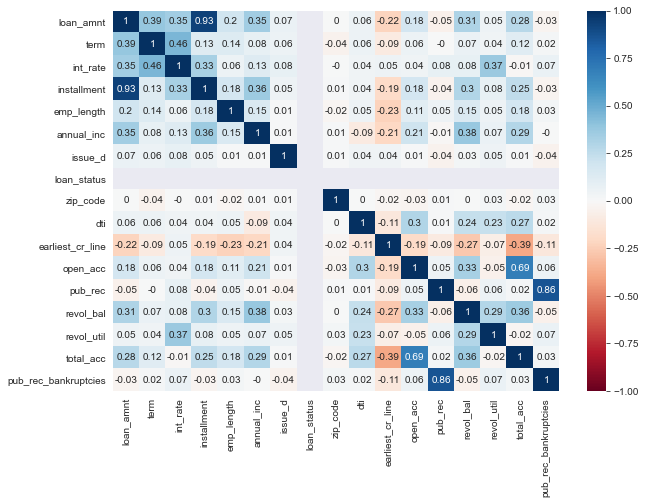

In [346]:
plt.figure(figsize=(10,7))
corrmat = loan_df_defaulters_intTypes.corr() 
sns.heatmap(round(corrmat,2), cmap='RdBu', annot=True, annot_kws={"size": 10}, vmin=-1, vmax=1); 
plt.show()


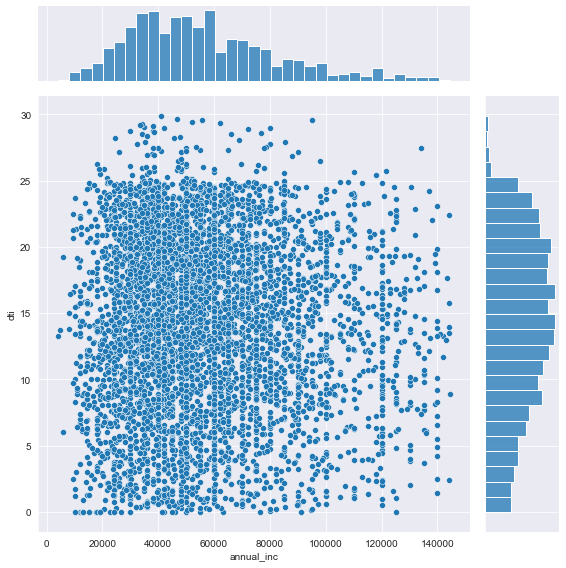

In [349]:
sns.jointplot(res_annual_inc[res_annual_inc.loan_status==0].annual_inc,loan_df_defaulters_intTypes.dti, kind="scatter",height=8)


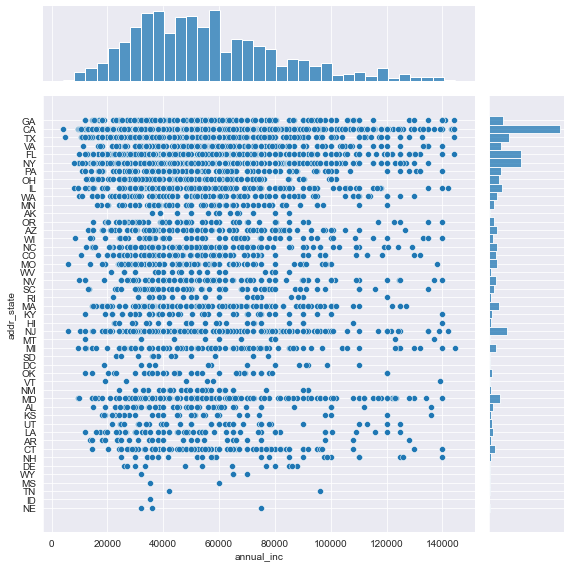

In [354]:
sns.jointplot(res_annual_inc[res_annual_inc.loan_status==0].annual_inc,loan_df_defaulters.addr_state, kind="scatter",height=8)


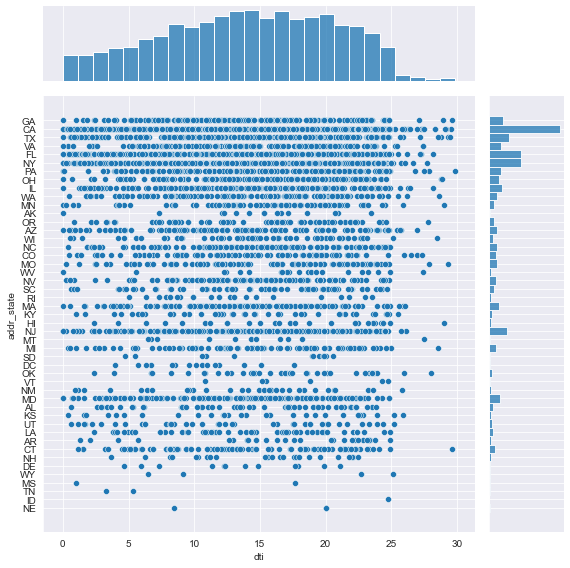

In [356]:
sns.jointplot(loan_df_defaulters_intTypes.dti,loan_df_defaulters.addr_state, kind="scatter",height=8)


In [374]:
res_heatmap= pd.pivot_table(loan_df_defaulters,index='addr_state' ,
                            columns="home_ownership",values='dti' )

<AxesSubplot:xlabel='home_ownership', ylabel='addr_state'>

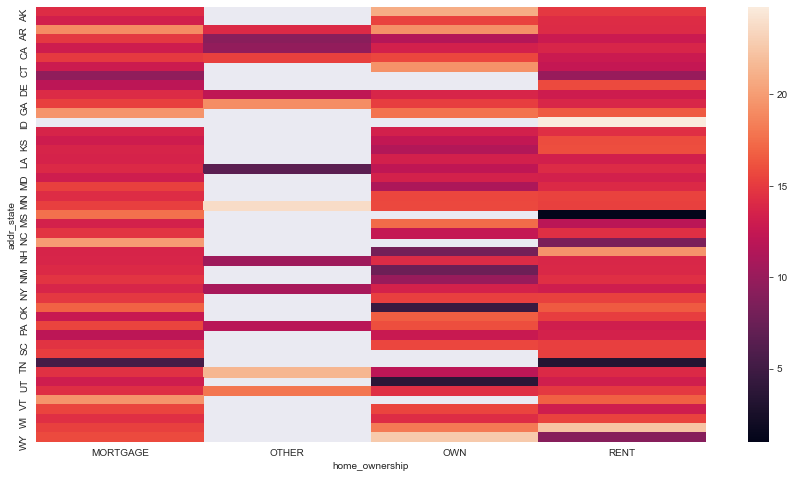

In [375]:
plt.figure(figsize=(15,8))
sns.heatmap(res_heatmap)